# Multilayer Perceptron

---
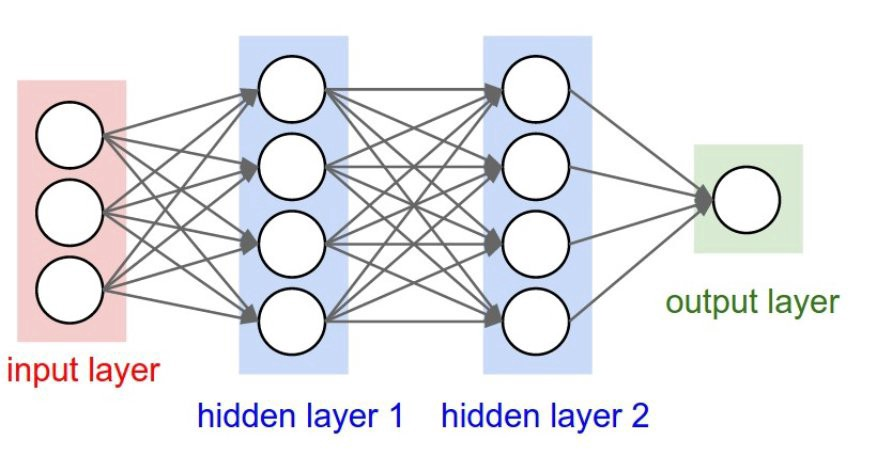


A Multilayer Perceptron is a Neural Network that learns the relationship between linear and non-linear data. It is a multi-layer perceptron network. It consists of at least three layers:
* An Input Layer
* One or more hidden layers
* An Output layer

---

Except for the input nodes, each node is a neuron that uses a nonlinear activation function (specified by the user during model construction). It uses a supervised learning technique called *backpropagation* for training.

---

For our example, we'll be using the Fashion_MNIST dataset from the Keras API, a high-level Deep Learning API that allows us to easily build, train, evaluate, and execute all sorts of neural networks. Documentation can be found at [Keras](https://keras.io/). The Fashion_MNIST dataset, similar to the original MNIST dataset, contains 70,000 grayscale images of 28x28 pixels each with 10 classes. However, unlike MNIST which contains images of digits, Fashion_MNIST contains images that represent fashion items, as the title implies. 

For this example we'll be using the implementation of Keras from Tensorflow, documentation for which can be found at [TensorFlow](https://www.tensorflow.org/).

---


In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fashion = tf.keras.datasets.fashion_mnist

---

Now we'll split our dataset into our training and test datasets

---

In [3]:
(X_train, y_train), (X_test, y_test) = fashion.load_data()

---

Unlike MNIST where the label 5 corresponds to 5 and no further modifications are necessary, Fashion_MNIST class names are not included with the dataset. We'll create them now to use later for plotting purposes.

---

In [4]:
class_names = ["T-shirt/top", 
               "Pants", 
               "Pullover", 
               "Dress", 
               "Coat", 
               "Sandal", 
               "Shirt", 
               "Sneaker", 
               "Bag", 
               "Boot"]

---

To confirm our code works, we know that the first image in our training label is a Boot:

---

In [5]:
class_names[y_train[0]]

'Boot'

## Exploratory Data Analysis

---

We will now explore the format of our dataset before we begin training.

---

In [6]:
print(f"Train Images Shape: {X_train.shape}")
print(f"Train Labels Shape: {y_train.shape}")
print(f"Test Images Shape: {X_test.shape}")
print(f"Test Labels Shape: {y_test.shape}")

Train Images Shape: (60000, 28, 28)
Train Labels Shape: (60000,)
Test Images Shape: (10000, 28, 28)
Test Labels Shape: (10000,)


---

Let's now plot one of our training_images to see what we're training on. We'll use the first training image because we already know it's a Boot.

---

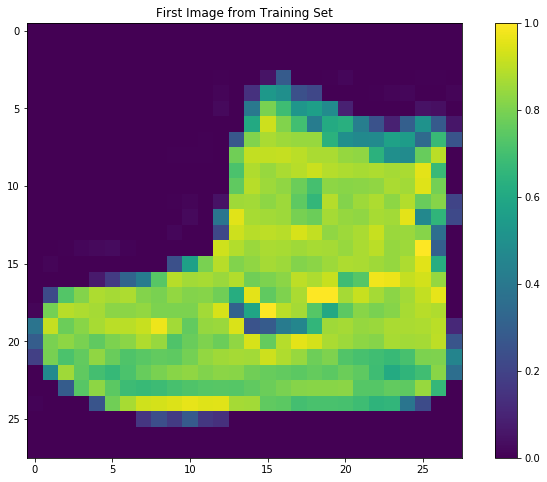

In [13]:
plt.figure(figsize=(12,8))
plt.imshow(X_train[0])
plt.colorbar()
plt.title("First Image from Training Set")
plt.show()

---

As we can see from the colorbar to the right of the plot above, our pixel values fall in a range from 0 to 255. We'll need to scale them to a range of 0 to 1 before we begin training. We'll want to scale both the training *and* the test set to ensure our model remains accurate.

After we scale our datasets, we'll verify that the images are in the correct format by plotting the first 10 images of the training set.

---

In [8]:
X_train = X_train / 255.0
X_test = X_test /255.0

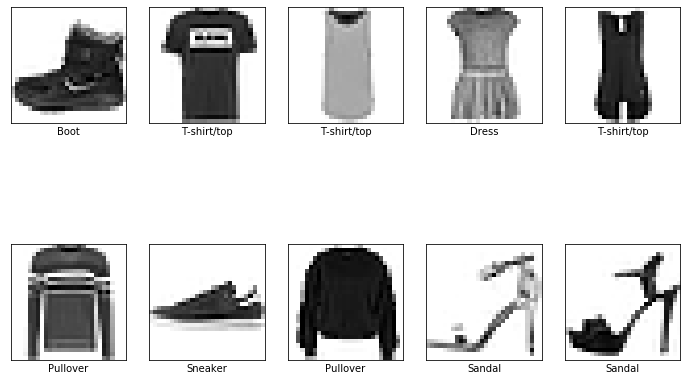

In [9]:
plt.figure(figsize=(12,8))
for _ in range(10):
    plt.subplot(2, 5, _+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[_], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[_]])
plt.show()

## Model Construction

---

We will now build our MLP and configure the layers of our model. The first line will create a ```Sequential``` model and is the simplest kind of Keras model for neural networks. The layers are as follows:

- Layer 1, ```tf.keras.layers.Flatten```, transforms the format of the images from a 2D array to a 1D array. It unstacks the rows of pixels and lines them up.
- Layers 2-4 are a sequence of ```Dense``` layers with 300, 100, and 10 neurons, respectively. 
    - Layer 2 with 300 neurons will use the **ReLU** activation function.
    - Layer 3 with 100 neurons will use the **ReLU** activation function.
    - Layer 4 with 10 neurons (representing the 10 classes) will use the **softmax** activation function.
    
--- 

In [10]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28, 28]))
model.add(tf.keras.layers.Dense(300, activation = 'relu'))
model.add(tf.keras.layers.Dense(100, activation = 'relu'))
model.add(tf.keras.layers.Dense(10, activation = 'softmax'))

---

Let's use the model's ```summary()``` method to display information about our neural network.

---

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


---

We see that the dense layers have a high number of parameters; the first layer has 784 * 300 weights + 300 biases equals 235,500 parameters! This provides a high amount of flexibility for the model to fit the training data, but this could pose a risk of overfitting if the training dataset is not large enough.

---

## Compile Model

---

After we build the model we must next call the ```compile()``` method to specify the loss function, the optimizer we wish to use (in this case, we'll use Stochastic Gradient Descent), and our metrics. 

---

In [12]:
model.compile(optimizer = 'sgd',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

## Training the Model

---

Our model is now ready for training. This requires us to feed the training data into the model where it learns to associate images and labels.

We'll use the ```fit()``` method to train and pass our input features(X_train) and target classes (y_train), as well as the number of epochs to train.

---

In [14]:
history = model.fit(X_train,
                    y_train,
                    epochs=30)

Epoch 1/30


C:\anaconda3\lib\site-packages\tensorflow\python\keras\backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 2s 950us/step - loss: 0.6912 - accuracy: 0.7714
Epoch 2/30
1875/1875 [==============================] - 2s 959us/step - loss: 0.4813 - accuracy: 0.8332
Epoch 3/30
1875/1875 [==============================] - 2s 894us/step - loss: 0.4360 - accuracy: 0.8478
Epoch 4/30
1875/1875 [==============================] - 2s 888us/step - loss: 0.4085 - accuracy: 0.8564
Epoch 5/30
1875/1875 [==============================] - 2s 880us/step - loss: 0.3871 - accuracy: 0.8638
Epoch 6/30
1875/1875 [==============================] - 2s 884us/step - loss: 0.3712 - accuracy: 0.8684
Epoch 7/30
1875/1875 [==============================] - 2s 899us/step - loss: 0.3580 - accuracy: 0.8723
Epoch 8/30
1875/1875 [==============================] - 2s 903us/step - loss: 0.3449 - accuracy: 0.8770
Epoch 9/30
1875/1875 [==============================] - 2s 909us/step - loss: 0.3344 - accuracy: 0.8814
Epoch 10/30
1875/1875 [==============================] - 2s 892us/step - lo

---

Our model is now trained! As the model trains, keras displays the loss and accuracy metrics on each epoch iteration. Our model reaches an accuracy of about 92% on the training data.

---

## Evaluate Accuracy

---

Now that we are satisfied with our model's accuracy, we should evaluate it on the test set to estimate the generalization error. To do so we'll call the ```evaluate()``` method.

---

In [18]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"\nTest Accuracy: {np.round(test_acc * 100,2) }%")

313/313 [==============================] - 0s 591us/step - loss: 0.3352 - accuracy: 0.8844

Test Accuracy: 88.44%


---

Our test accuracy is about 4 percentage points lower than the accuracy achieved on our training dataset. This is most likely due to **overfitting**. Overfitting occurs when a ML model "memorizes" the noise and details in the training dataset more than it should which negatively impacts model performance.

---


## Make Predictions

---

We'll next call the model's ```predict()``` method to make predictions on new instances, or in this case the first 5 instances of our test set. 

---

In [19]:
X_new = X_test[:5]
y_prob = model.predict(X_new)
y_prob.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.14, 0.  , 0.02, 0.  , 0.01, 0.  , 0.83, 0.  , 0.  , 0.  ]],
      dtype=float32)

---

We can see above that because we called the ```softmax``` activation function on the last layer, the model returns probability estimates per class for each instance of the dataset.

Let's see what the corresponding labels are for these fashion items.

---


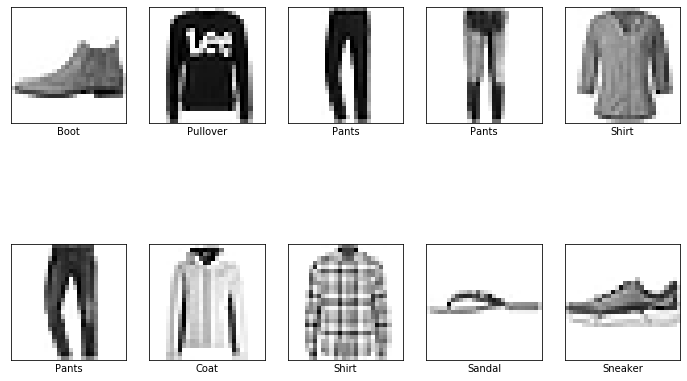

In [20]:
plt.figure(figsize=(12,8))
for _ in range(10):
    plt.subplot(2, 5, _+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_test[_], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[_]])
plt.show()